In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

In [5]:
data['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [12]:
### divide the data into features and target
x = data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].values
y = data['Species'].values

In [ ]:
print(x)

In [ ]:
print(y)

In [29]:
### Split the data into training and testing samples
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.80,random_state=3)

In [30]:
import numpy as np
np.unique(ytrain,return_counts=True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([40, 40, 40]))

In [50]:
### Build the model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=17)

In [51]:
### Train the model
model.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [52]:
#### Predictions
ypred = model.predict(xtest)

In [53]:
ypred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

In [54]:
ytest

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

In [55]:
df = pd.DataFrame()
df['Actual Value'] = ytest
df['Predicted Value'] = ypred
df

,Actual Value,Predicted Value
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa
5,Iris-virginica,Iris-virginica
6,Iris-versicolor,Iris-versicolor
7,Iris-setosa,Iris-setosa
8,Iris-virginica,Iris-virginica
9,Iris-versicolor,Iris-versicolor


In [56]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(ytest,ypred)
acc

1.0

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ypred)
cm

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]])

In [58]:
accuracy = []
k_value = []
for k in range(1,100,2):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(xtrain,ytrain)
  ypred = model.predict(xtest)
  acc = accuracy_score(ytest,ypred)
  accuracy.append(acc)
  k_value.append(k)

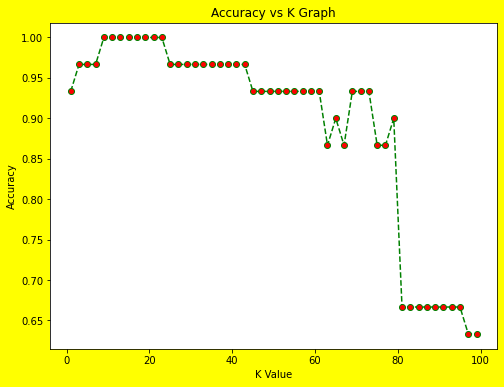

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6),facecolor='yellow')
plt.title("Accuracy vs K Graph")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.plot(k_value,accuracy,color='green',linestyle='dashed',marker='o',markerfacecolor="red")
plt.show()

In [ ]:
accuracy

In [62]:
### Predicitng a new value
model.predict([[4.7,3.4,1.2,2.3]])

array(['Iris-setosa'], dtype=object)